# Causal Inference
Why hunting correlation stars is not sufficient


![](../assets/2723_robberies-in-alaska_correlates-with_professor-salaries-in-the-us.png)

If you are simply observing correlation is ok, but as soon as you start making decisions based on correlation, you are in trouble. Decision-making needs causality. So what is causality and how do we infer it?

# Defining causal effects

### Correlation vs. Causality
- Correlation refers to the statistical relationship between two variables, where a change in one variable is associated with a change in the other.
- Causality, on the other hand, implies that a change in one variable directly causes a change in the other variable.
- It is important to remember that correlation does not necessarily imply causality.

Assume two worlds: Earth and Not-Earth. On earth when it rains, the grass gets wet. On Not-Earth rain does not affect the surface (due to wired physics).  So rain causes an effect if and only if (iff) raining leads to wet grass cp.
More formally an action A causes an effect on Y iff changing A leads to a change in Y keeping all other variables constant (ceteris paribus, c.p.). We call this an **intervention**: do(A). 

### Causal Effect
- A causal effect is the change in an outcome variable that is directly attributable to a change in a treatment or policy variable.
- Estimating causal effects is the primary goal of many economic studies, as it helps policymakers make informed decisions.

$E[Y | do(A=a)]- E[Y | do(A=a')]$ = Causal Effect of A on Y

### Causal Inference
- Causal inference is the process of determining the causal effect of a treatment or policy on an outcome variable.
- Randomized controlled trials (RCTs) are considered the gold standard for causal inference, as they minimize the influence of confounding factors.
- When RCTs are not feasible, economists rely on quasi-experimental methods such as instrumental variables, difference-in-differences, and regression discontinuity designs to estimate causal effects.

Understanding these concepts is essential for designing and interpreting economic studies that aim to uncover the true causal relationships between variables of interest.


### Real world
In the real world we do not observe non-earth directly, ie. we do not observe the counterfactual. We can only observe the world where we are in. So we need to estimate the counterfactual. This is the fundamental problem of causal inference.

In [6]:
import dowhy
from dowhy import CausalModel

#import test data
import dowhy.datasets
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True,
    stddev_treatment_noise=10)
data

{'df':        Z0        Z1        W0        W1        W2        W3        W4     v0  \
 0     0.0  0.900453  0.676211  0.617330 -0.541427  1.928503  2.002465   True   
 1     0.0  0.333987  1.113861 -0.304182 -0.266193  0.375564  0.493472  False   
 2     0.0  0.457113  0.088335  1.021602  0.552011  1.695003 -0.026080   True   
 3     0.0  0.940015 -0.388004  0.674000 -0.495613 -0.679707  1.582447   True   
 4     1.0  0.602920  0.986558  1.916419 -0.246247  3.170167 -0.287006   True   
 ...   ...       ...       ...       ...       ...       ...       ...    ...   
 9995  0.0  0.351277  1.027071 -0.350327 -1.698737  1.481262  1.352084   True   
 9996  0.0  0.811138 -0.080913 -0.939359 -0.354332 -0.158922 -0.325721   True   
 9997  0.0  0.183511  0.198017  0.871007 -0.123673  1.178272  0.904980   True   
 9998  0.0  0.956130  1.721961  0.476726 -1.211280  0.763128  2.208476   True   
 9999  0.0  0.598860  0.644246  0.497734 -0.530307  1.716287 -0.700408   True   
 
               y  
 

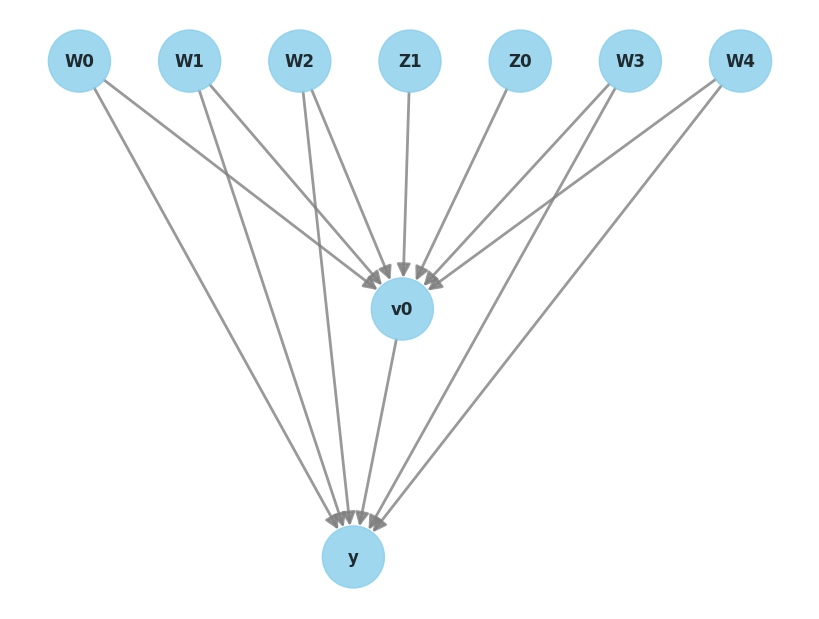

In [9]:
# Create a causal model from the data and given common causes.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    common_causes=data["common_causes_names"],
    instruments=data["instrument_names"]
)   
model.view_model(layout="dot")
